<center><span style="font-family: TimesNewRoman; font-size:1.5em;color:Brown;"><b>  Linear Regression:  Predict Price for Used Car in India</b></span></center><br>

## Context
    
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.
In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market. We have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.</p>

A key challenge for car sellers is determining the car’s sale price. The ability to predict the exact car value is beneficial for car owners and buyers to plan their finances according to the price trend. The car prices depend on the number of features like car mileage, car power, car year, etc.The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

<p style = "font-size : 20px ; color: black;font-family:TimesNewRoman">
    <b>Table of Contents</b>
</p><br>
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">
    
- [Data Set](#Data-Set)

-  [Problem](#Problem)

- [Libraries](#Libraries)

- [Read and Understand Data](#Read-and-Understand-data)

- [Data Preprocessing](#Data-Preprocessing)
    
- [Basic EDA](#EDA)    
    
- [Handling Missing Value](#Handling-missing-values)
    
- [Exploratory Data Analysis](#Exploratory-Data-Analysis) 
    
- [Insights based on EDA](#Insights-based-on-EDA)
  
- [Model Building](#Model-Building)
    
- [Test Assumptions](#Test-Assumptions) 
    
- [Recommendation](#Recommendation)

<br>


## Data Set
<br>
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">
    
1. S.No. : Serial Number<br>
    
2. Name : Name of the car which includes Brand name and Model name<br>
    
3. Location : The location in which the car is being sold or is available for purchase Cities<b<br>r>
    
4. Year : Manufacturing year of the car<br>
    
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.<br>
    
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)<br>
    
7. Transmission : The type of transmission used by the car. (Automatic / Manual)<br>
    
8. Owner : Type of ownership<br>
    
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg<br>
    
10. Engine : The displacement volume of the engine in CC.<br>
    
11. Power : The maximum power of the engine in bhp.<br>
    
12. Seats : The number of seats in the car.<br>
    
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)<br>
    
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)<br>
</p>

## Problem
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">

- Does various predicating factors effect the price of the used car .?<br>
- What all  independent variables effect the pricing of used cars?<br>
- Does name of a car have any effect on  pricing of car.?<br>
- How does type of Transmission  effect  pricing?<br>
- Does Location in which the car being sold has any effect on the price?<br>
- Does kilometers_Driven,Year of manufacturing  have negative correlation with  price of the car?<br>
- Does Mileage ,Engine and Power have any effect on the pricing of the car?<br>
- How does number of seat ,Fuel type effect the pricing.?<br>
</p>

# Libraries


In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
from scipy.stats import skew
plt.style.use('ggplot')
import missingno as msno # to get visualization on missing values
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
import statsmodels.api as sm
print("Load Libraries- Done")

Load Libraries- Done


# Read and Understand data

In [2]:
#Reading the csv file  used car data.csv 
data_path=r'C:\Users\jadha\Desktop\PROJECTS\ML\linear regression\YD\used_cars_data.csv'
df=pd.read_csv(data_path,index_col=0)
cars=df.copy()
print(f'There are {cars.shape[0]} rows and {cars.shape[1]} columns') # fstring 

There are 7253 rows and 13 columns


In [3]:
# inspect data, print top 5 
cars.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,NaN,12.50000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00000,8.61 Lakh,4.50000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00000,NaN,6.00000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00000,NaN,17.74000


In [4]:
# bottom 5 rows:
cars.tail(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00000,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00000,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00000,NaN,NaN


In [5]:
#get the size of dataframe
print ("Rows     : " , cars.shape[0])  #get number of rows/observations
print ("Columns  : " , cars.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", cars.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", cars.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(cars.isna().sum() / cars.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", cars.nunique())  #  count of unique values


Rows     :  7253
Columns  :  13
######################################## 
 Features : 

 ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']
######################################## 
Missing values :

 New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64
######################################## 
Percent of missing :

 Name                 0.00000
Location             0.00000
Year                 0.00000
Kilometers_Driven    0.00000
Fuel_Type            0.00000
Transmission         0.00000
Owner_Type           0.00000
Mileage              0.03000
Engine               0.63000
Power              

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


<AxesSubplot:>

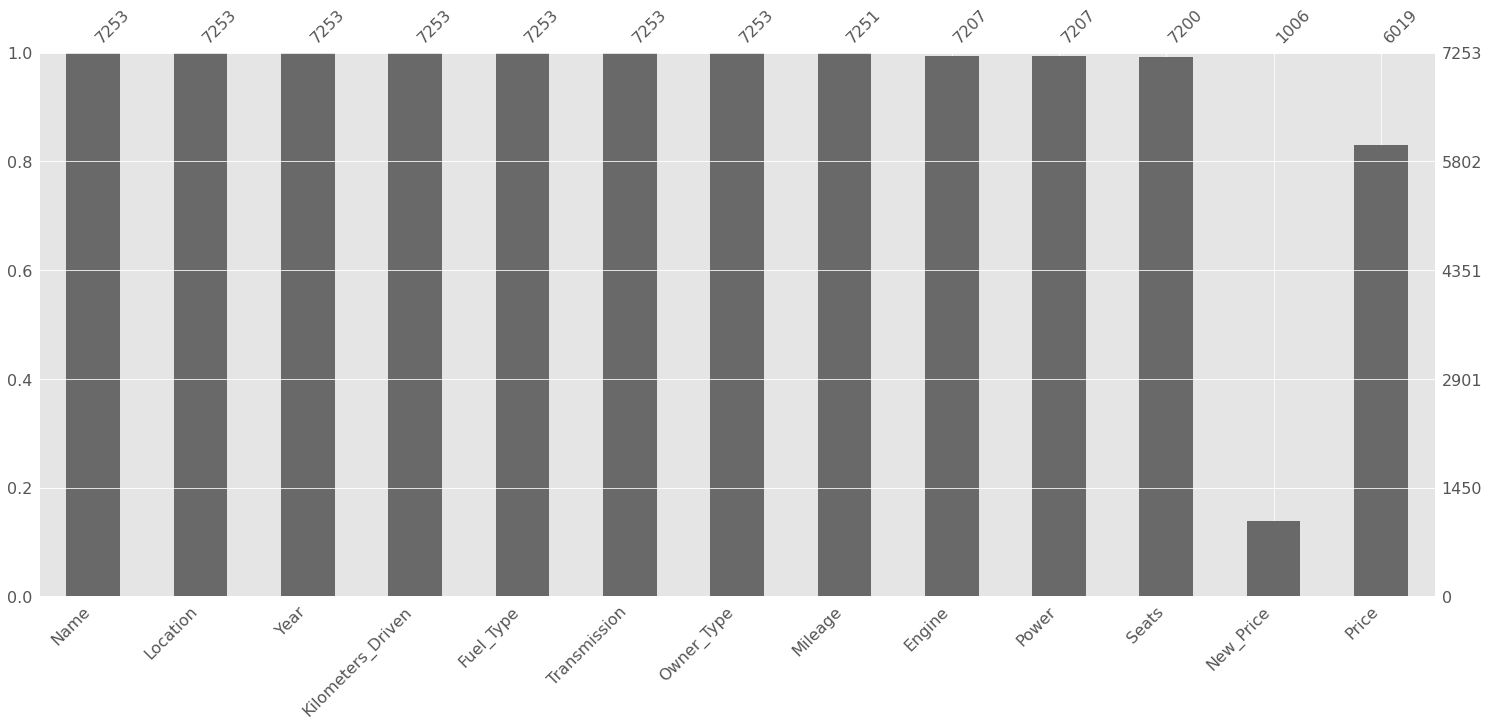

In [7]:
#Visualize missing values
msno.bar(cars)

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
<b>Observations</b></p>
This preview  shows that some columns potentially have a lot of missingness so we'll want to make sure to look into that later.

-  **`New_Price`** has only 1006 values. 86 % values are missing

-  **`Price`**, which is a Target variable 17 % missing values.This needs to be analysed further.

-  **`Seats`** has only 53 values missing and number of seats can be one of key factor in deciding price.
-  **`Power`** and **`Engine`** has 46 missing values.

-  **`Mileage`** only has two values missing.

-  **`Mileage`,`Power`,`Engine`,`New_Price`** we know are quantitative variables but are of object dtype here and needs to to converted to numeric.

In [8]:
# Making a list of all categorical variables
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
    
]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(cars[column].value_counts())
    print("#" * 40)


Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
########################################
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
########################################
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
########################################
5.00000     6047
7.00000      796
8.00000      170
4.00000      119
6.00000       38
2.00000       18
10.00000       8
9.00000        3
0.00000        1
Name: Seats, dtype: int64
########################################
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998  

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>  Observations</b></p>

 - Maximum car being sold have fuel type as Diesel.
 - Mumbai has highest numbers of car availabe for purchase.
 - 5204 cars with Manual transmission are available for purchase.
 - Most of the cars are 5 seaters and First owned.
 - Years of car ranges form 1996- 2015

# <p style = "font-size : 25px ;text-align: center;color:blue;font-family:TimesNewRoman"><b>I. DATA PRE-PROCESSING</b></p>
The purpose of preprocessing is to convert raw data into a form that fits machine learning. Structured and clean data allows a data scientist to get more precise results from an applied machine learning model. The technique includes data formatting, cleaning, and sampling.</b>
* Why is Data preprocessing important?</b>
Preprocessing of data is mainly to check the data quality. The quality can be checked by the following

Accuracy: To check whether the data entered is correct or not.</p>
Completeness: To check whether the data is available or not recorded.</p>
Consistency: To check whether the same data is kept in all the places that do or do not match.</p>
Timeliness: The data should be updated correctly.</p>
Believability: The data should be trustable.</p>
Interpretability: The understandability of the data.</p>
* Major Tasks in Data Preprocessing:</p>
Data cleaning</p>
Data integration</p>
Data reduction</p>
Data transformation</p>

## <p style = "font-size : 25px ;text-align: left;color:brown;font-family:TimesNewRoman"><b>DATA CLEANING</b></p>
Data cleaning is the process to remove incorrect data, incomplete data and inaccurate data from the datasets, and it also replaces the missing values. There are some techniques in data cleaning
* What is Data Preprocessing?

Data preprocessing is the process of cleaning and preparing the raw data to enable feature engineering. After getting large volumes of data from sources like databases, object stores, data lakes, engineers prepare them so data scientists can create features. 

### 1. Processing Engine,Power ,Mileage columns

Datatype for Engine ,Power and Mileage  are object because of unit assigned ,so striping  units.

In [9]:
#np.random.seed(9)
cars[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
S.No.,,,
2382,2143 CC,203.2 bhp,15.26 kmpl
2244,1396 CC,90 bhp,21.9 kmpl
3468,1197 CC,82 bhp,18.9 kmpl
3370,1196 CC,70 bhp,15.6 kmpl
6534,1248 CC,73.9 bhp,21.1 kmpl
7229,1598 CC,103.6 bhp,14.4 kmpl
3169,2143 CC,170 bhp,19.27 kmpl
6369,1396 CC,69.01 bhp,25.0 kmpl
5810,1498 CC,98.6 bhp,25.1 kmpl


In [10]:
typeoffuel=['CNG','LPG']
cars.loc[cars.Fuel_Type.isin(typeoffuel)].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.00000,NaN,2.35000
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,3.25000
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.00000,NaN,1.40000
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.00000,NaN,4.70000
839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,5.00000,NaN,2.10000
893,Hyundai Accent Executive CNG,Hyderabad,2010,95637,CNG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.00000,NaN,1.90000
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.00000,NaN,2.85000
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.00000,NaN,1.45000


Power has some values as "nullbhp" .Mileage also has some observations as 0. For fuel type and CNG and LPG mileage is measured in km/kg where as for other type it is measured in kmpl. Since  those units are in  km for both of them no need of conversion . Dropping units from mileages,Engine and Power.

### Mileage

In [11]:
cars[cars.Mileage.isnull()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.00000,13.58 Lakh,13.00000
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.00000,NaN,12.75000


In [12]:
cars["Mileage"] = cars["Mileage"].str.rstrip(" kmpl")
cars["Mileage"] = cars["Mileage"].str.rstrip(" km/g")

### Engine 

In [13]:
#remove units
cars["Engine"] = cars["Engine"].str.rstrip(" CC")

### Power

In [14]:
#remove bhp and replace null with nan
cars["Power"] =cars["Power"].str.rstrip(" bhp")     #The rstrip() method removes any trailing characters (characters at the end a string), space is the default trailing character to remove.
cars["Power"]= cars["Power"].replace(regex="null", value = np.nan)

In [15]:
#verify the data
num=['Engine','Power','Mileage']
cars[num].sample(20)

,Engine,Power,Mileage
S.No.,,,
413,1995,190,21.76
5378,1298,85.8,17.5
3991,1461,63.1,23.08
6436,1248,74,26.59
2031,2494,100.6,12.99
3379,1461,83.8,20.45
5035,1196,70,15.6
1803,1197,103.5,17.21
1648,998,66.1,16.98


I had seen some values in Power and Mileage as 0.0 so verifying data for Engine, Power, Mileage. Will check once again after converting datatype

In [16]:
cars.query("Power == '0.0'")['Power'].count() #The query() method takes a query expression as a string parameter, which has to evaluate to either True of False. It returns the DataFrame where the result is True according to the query expression.

0

In [17]:
cars.query("Mileage == '0.0'")['Mileage'].count()

81

Converting this observations to Nan so we will remember to handle them when handling missing values.

In [18]:
cars.loc[cars["Mileage"]=='0.0','Mileage']=np.nan

In [19]:
cars.loc[cars["Engine"]=='0.0','Engine'].count()

0

In [20]:
cars[num].nunique()

Engine     150
Power      385
Mileage    437
dtype: int64

In [21]:
cars[num].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

There are 46 missing values in Engine, 175 in  Power,83 in Mileage. 

___________________________________________________________________________________________________________________________________________________________________

###  Processing Seats

In [22]:
cars.query("Seats == 0.0")['Seats']  #The query() method takes a query expression as a string parameter, which has to evaluate to either True of False. It returns the DataFrame where the result is True according to the query expression.

S.No.
3999   0.00000
Name: Seats, dtype: float64

In [23]:
#seats cannot be 0 so changing it to nan and will be handled in missing value
cars.loc[3999,'Seats'] =np.nan


___________________________________________________________________________________________________________________________________________________________________

###  Processing  New Price
We know that `New_Price` is the price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

This column clearly has a lot of missing values. We will impute the missing values later. For now we will only extract the numeric values from this column.


In [24]:
# Create a new column after splitting the New_Price values.
import re

new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # that we see in the sample output
            print(
                "The data needs furthur processing.mismatch ",
                observation,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.02 Cr
The data needs furthur processing.mismatch  1.4 Cr
The data needs furthur processing.mismatch  1.06 Cr
The data needs furthur processing.mismatch  1.27 Cr
The data needs furthur processing.mismatch  1.13 Cr
The data needs furthur processing.mismatch  1.36 Cr
The data needs furthur processing.mismatch  1.66 Cr
The data needs furthur processing.mismatch  1.6 Cr
The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  2.3 Cr
The data needs furthur processing.mismatch  1.71 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.58 Cr
The data needs furthur processing.mismatch  3.75 Cr
The data needs fur

In [25]:
new_price_num = []

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
cars["new_price_num"] = new_price_num

# Checking the new dataframe
cars.head(5)  # Looks ok

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00000,NaN,1.75000,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00000,NaN,12.50000,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00000,8.61 Lakh,4.50000,8.61000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00000,NaN,6.00000,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00000,NaN,17.74000,NaN


___________________________________________________________________________________________________________________________________________________________________

# Feature Enginering

* Feature engineering is the creation of features from raw data. </p>
Feature engineering includes:

Determining required features for ML mode</p>
Analysis for understanding statistics, distribution, implementing one hot encoding and imputation, and more. Tools like Python and Python libraries are used.</p>
Preparing features for ML model consumption</p>
Building the models</p>
Testing if the features achieve what is needed</p>
Repeating the preparation and testing process, by running experiments with different features, adding, removing and changing features. During the process, the data scientist might find out data is missing from the sources. The data scientist will request preprocessing again from the data engineer.</p>
Deployment to the ML pipeline

## converting datatype

In [26]:
#converting object data type to category data type
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")
#converting datatype  
cars["Mileage"] = cars["Mileage"].astype(float)
cars["Power"] = cars["Power"].astype(float)
cars["Engine"]=cars["Engine"].astype(float)

In [27]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.00000,2013.36537,3.25442,1996.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,7253.00000,58699.06315,84427.72058,171.00000,34000.00000,53416.00000,73000.00000,6500000.00000
Mileage,7170.00000,18.34653,4.15791,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,7207.00000,1616.57347,595.28514,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7078.00000,112.76521,53.49355,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7199.00000,5.28046,0.80933,2.00000,5.00000,5.00000,5.00000,10.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000
new_price_num,1006.00000,22.77969,27.75934,3.91000,7.88500,11.57000,26.04250,375.00000


### Processing Years to Derive Age of car
Since year has 2014, 1996  etc. But this will not help to understand how old cars is and its effect on  price.
so creating  two new columns current year and Age . Current year would be 2021 and Age column would be Ageofcar= currentyear-year. And then drop currentyear columns


In [28]:
cars['Current_year']=2021
cars['Ageofcar']=cars['Current_year']-cars['Year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,NaN,1.75000,NaN,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,NaN,12.50000,NaN,6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61 Lakh,4.50000,8.61000,10
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,NaN,6.00000,NaN,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,NaN,17.74000,NaN,8


### Processing Name column

Brands do play an important role in Car selection and Prices. So extracting brand names from the Name.

In [29]:
#dropping rows with name as null
cars['Name'] = cars.dropna(subset=['Name'])

In [30]:
#As mentioned in dataset car name has Brand and model so extracting it ,This can help to fill missing values of price column as brand 
cars['Brand'] = cars['Name'].str.split(' ').str[0] #Separating Brand name from the Name
cars['Model'] = cars['Name'].str.split(' ').str[1] + cars['Name'].str.split(' ').str[2]


In [31]:
cars.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [32]:
col=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
cars[cars.Brand.isin(col)].sample(5)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
3624,ISUZU D-MAX V-Cross 4X4,Coimbatore,2018,20422,Diesel,Manual,First,12.40000,2499.00000,134.00000,5.00000,NaN,16.09000,NaN,3,ISUZU,D-MAXV-Cross
6426,Land Rover Range Rover HSE,Hyderabad,2015,30000,Diesel,Automatic,First,12.70000,2179.00000,187.70000,5.00000,NaN,NaN,NaN,6,Land,RoverRange
1513,Land Rover Range Rover 2.2L Pure,Bangalore,2014,56000,Diesel,Automatic,First,12.70000,2179.00000,187.70000,5.00000,NaN,34.50000,NaN,7,Land,RoverRange
3839,Land Rover Discovery 3 TDV6 Diesel Automatic,Pune,2012,117236,Diesel,Automatic,Second,11.80000,2720.00000,190.00000,7.00000,NaN,14.00000,NaN,9,Land,RoverDiscovery
1038,Land Rover Range Rover TDV8 (Diesel),Bangalore,2011,55000,Diesel,Automatic,First,10.20000,4367.00000,308.00000,7.00000,NaN,67.00000,NaN,10,Land,RoverRange


Brand names like ISUZU and Isuzu are same and needs to be corrected. Land, Mini seems to be incorrect. So correcting brand names.

In [33]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7199 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7253 non-null   int64   
 15  Brand              7253 non-null   object  
 16  Model 

In [34]:
#changing brandnames
cars.loc[cars.Brand == 'ISUZU','Brand']='Isuzu'
cars.loc[cars.Brand=='Mini','Brand']='Mini Cooper'
cars.loc[cars.Brand=='Land','Brand']='Land Rover'
#cars['Brand']=cars["Brand"].astype("category")

In [35]:
cars.Brand.nunique()

32

In [36]:
cars.groupby(cars.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

There are 32 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

In [37]:
cars.Model.isnull().sum()

1

In [38]:
#drop row with no model
cars.dropna(subset=['Model'],axis=0,inplace=True)

In [39]:
cars.Model.nunique()

726

In [40]:
cars.groupby('Model')['Model'].size().nlargest(30)

Model
SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
FigoDiesel       61
Ecosport1.5      59
A42.0            56
AltoK10          56
VitaraBrezza     55
i20Asta          54
InnovaCrysta     53
i20Sportz        53
Duster110PS      51
Fortuner4x2      50
Name: Model, dtype: int64

There are 726 unique models and Swift Dzire is most popular Model.

## <p style = "font-size : 25px ;text-align: left;color:brown;font-family:TimesNewRoman"><b>EDA</b></p>


In [41]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   object  
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7169 non-null   float64 
 8   Engine             7206 non-null   float64 
 9   Power              7077 non-null   float64 
 10  Seats              7198 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7252 non-null   int64   
 15  Brand              7252 non-null   object  
 16  Model 

In [42]:
cars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar
count,7252.00000,7252.00000,7169.00000,7206.00000,7077.00000,7198.00000,6019.00000,1006.00000,7252.00000
mean,2013.36652,58700.26269,18.34711,1616.60505,112.76871,5.28049,9.47947,22.77969,7.63348
std,3.25316,84433.48037,4.15791,595.32041,53.49652,0.80938,11.18792,27.75934,3.25316
min,1996.00000,171.00000,6.40000,72.00000,34.20000,2.00000,0.44000,3.91000,2.00000
25%,2011.00000,34000.00000,15.30000,1198.00000,75.00000,5.00000,3.50000,7.88500,5.00000
50%,2014.00000,53429.00000,18.20000,1493.00000,94.00000,5.00000,5.64000,11.57000,7.00000
75%,2016.00000,73000.00000,21.10000,1968.00000,138.10000,5.00000,9.95000,26.04250,10.00000
max,2019.00000,6500000.00000,33.54000,5998.00000,616.00000,10.00000,160.00000,375.00000,25.00000


<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman"><b>Observations</b></p>

    
- Years is left skewed. Years ranges from 1996- 2019 . Age of cars 2 year old to 25 years old

- Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6500000. This is very high , and seems to be outlier. Need to analyze further.

- Mileage is almost Normally distrubuited

- Engine is right skewed and has outliers on higher  and lower end

- Power and Price are also right skewed.

- Price 160 Lakh is too much for a used car. Seems to be an outlier.

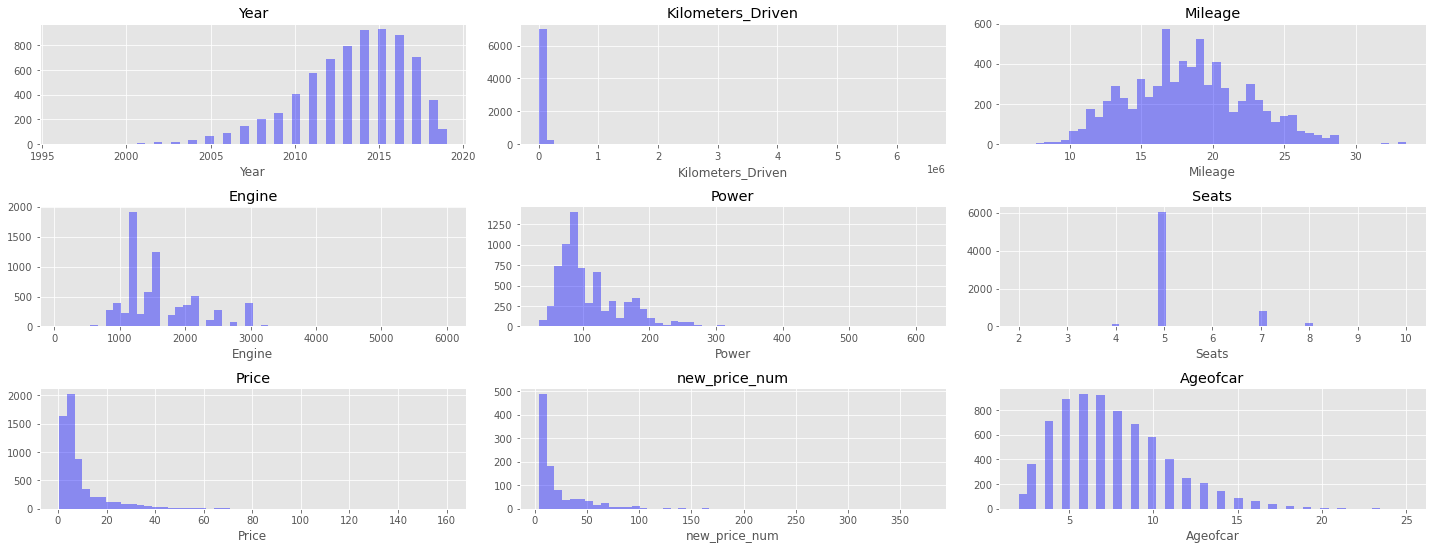

In [43]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)


<p style = "font-size : 15px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
    
  
- Year is left skewed and has outilers on lower side., This column can be dropped
- Kilometer_driven is right skewed.
- Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. need to check further.
- Engine ,power and price are  right skewed and has outliers on upper side.
- Age of car is right skewed.


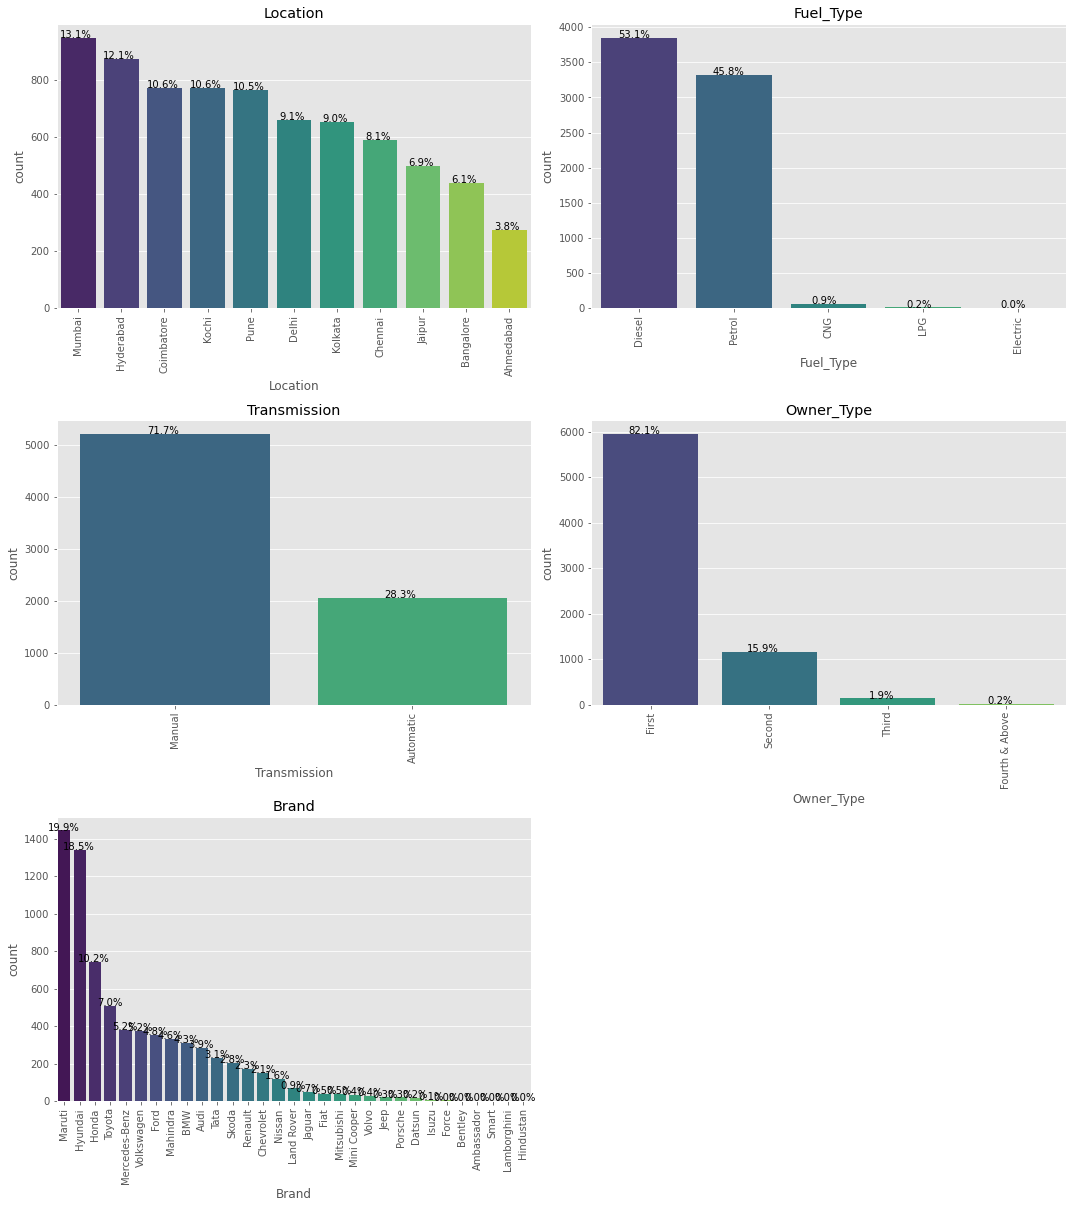

In [44]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand'] #cars.select_dtypes(exclude=np.number).columns.tolist()

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = cars[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=cars[variable], data=cars , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(cars[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)


<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
   
   **Car Profile**
    
-  ~71 % cars available for sell have manual Transmission.
- ~82 % cars are First owned cars.
- ~39% of car available for sale are from  Maruti & Hyundai brands.
-  ~53% of car being sold/avialable for purchase  have fuel type as Diesel .
- Mumbai has highest numbers of car availabe for purchase whereas Ahmedabad has least
- Most of the cars are 5 seaters.
- Car being sold/available for purchase are in  2 - 23 years old
- ~ 71% car are lower price range car.

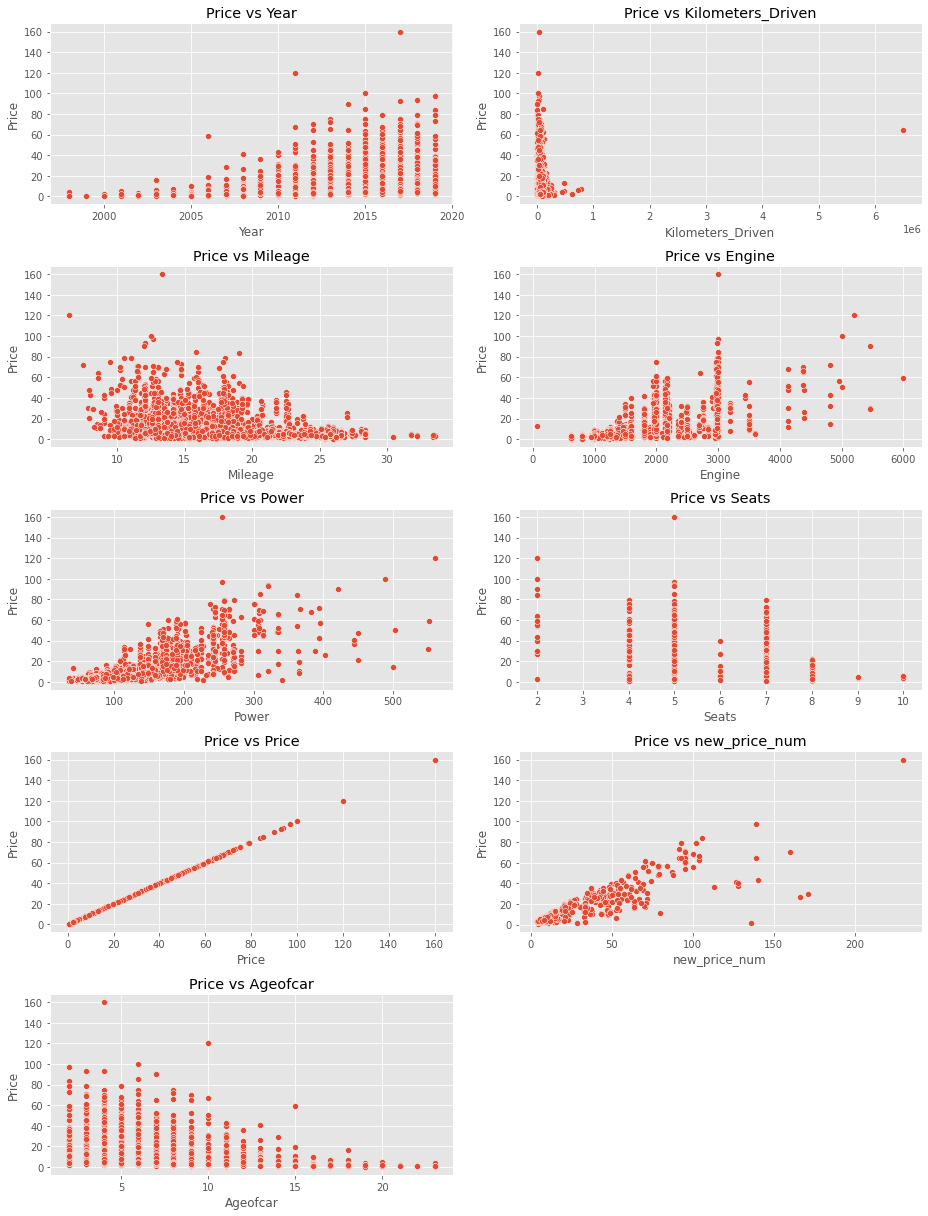

In [45]:
numeric_columns= numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cars[variable],y=cars['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

# Handling missing values

In [46]:
cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

### Calculating missing values in each row

In [47]:
# counting the number of missing values per row
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()

2    5025
3    1112
0     819
1     187
4      57
5      31
6      20
7       1
dtype: int64

In [48]:
#Investigating how many missing values per row are there for each variable
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = cars[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage      5
Price      182
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
New_Price        5025
new_price_num    5025
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage            25
Power              74
Seats               1
New_Price        1112
Price            1012
new_price_num    1112
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage          35
Power            50
Seats             6
New_Price        57
Price            23
new_price_num    57
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage           6
Engine           25
Power            30
Seats            26
New_Price        31
Price             6
new_price_num    31


This confirms that certain columns tend to be missing together or all nonmissing together. So will try to fill the missing values , as much as possible.

In [49]:
cars[num_missing==7]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Mahindra,TUV300


In [50]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

We can start filling missing values by grouping  name and year and fill in missing values. with median.

In [51]:
cars.groupby(['Name','Year'])['Engine'].median().head(30)  #(i.e. Use more than one column to perform the splitting). 


Name                                           Year
Ambassador Classic Nova Diesel                 2003   1489.00000
Audi A3 35 TDI Attraction                      2014   1968.00000
Audi A3 35 TDI Premium                         2016   1968.00000
Audi A3 35 TDI Premium Plus                    2015   1968.00000
                                               2016   1968.00000
Audi A3 35 TDI Technology                      2017   1968.00000
Audi A4 1.8 TFSI                               2010   1781.00000
                                               2011   1781.00000
Audi A4 1.8 TFSI Technology Edition            2012   1798.00000
Audi A4 2.0 TDI                                2009   1968.00000
                                               2011   1968.00000
                                               2012   1968.00000
                                               2013   1968.00000
                                               2014   1968.00000
Audi A4 2.0 TDI 177 Bhp Premium Plus  

In [52]:
cars['Engine']=cars.groupby(['Name','Year'])['Engine'].apply(lambda x:x.fillna(x.median()))
cars['Power']=cars.groupby(['Name','Year'])['Power'].apply(lambda x:x.fillna(x.median()))
cars['Mileage']=cars.groupby(['Name','Year'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [53]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      45
Power      162
Mileage     82
dtype: int64

In [54]:
cars.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova   1489.00000
Audi        A335          1968.00000
            A41.8         1781.00000
            A42.0         1968.00000
            A43.0         2967.00000
            A43.2         3197.00000
            A430          1395.00000
            A435          1968.00000
            A4New         1968.00000
            A62.0         1968.00000
Name: Engine, dtype: float64

As we can see most of the model have same engine 
size and instead  of just applying median , grouping with model and year that should give me more granularity, and near to accurate Engine values.


In [55]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model and year to get  more granularity and more accurate Engine and then fillig with median
cars['Engine']=cars.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))


In [56]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model to get more granularity and more accurate Engine
cars['Power']=cars.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [57]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model to get more granularity and more accurate Engine
cars['Mileage']=cars.groupby(['Brand','Model'])['Mileage'].apply(lambda x:x.fillna(x.median()))


In [58]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()


Engine     18
Power      63
Mileage    32
dtype: int64

 There are still missing values , analyzing further .Grouping by only Model for Engine and then filling missing values with median. For  Power and Mileage Engine values for a Brand can be used to get more accurate value.

In [59]:
cars.groupby(['Model','Year'])['Engine'].agg({'median','mean','max'}).sort_values(by='Model',ascending='True').head(10)

median        max       mean
Model   Year                                 
1000AC  1998  970.00000  970.00000  970.00000
1Series 2013 1995.00000 1995.00000 1995.00000
        2015 1995.00000 1995.00000 1995.00000
370ZAT  2012 3696.00000 3696.00000 3696.00000
3Series 2018 1995.00000 1995.00000 1995.00000
        2017 1995.00000 1995.00000 1995.00000
        2016 1995.00000 1995.00000 1995.00000
        2015 1995.00000 1995.00000 1995.00000
        2014 1995.00000 2993.00000 2078.16667
        2013 1995.00000 2993.00000 2066.42857

In [60]:
cars.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(10)

median       max      mean
Brand      Engine                                  
Ambassador 1489.00000  35.50000  35.50000  35.50000
Audi       1395.00000 147.51000 147.51000 147.51000
           1781.00000 163.20000 163.20000 163.20000
           1798.00000 187.74000 187.74000 181.03333
           1968.00000 174.33000 187.74000 167.12318
           1984.00000 207.90000 226.60000 196.02200
           2698.00000 179.50000 179.50000 179.50000
           2773.00000 201.00000 201.00000 201.00000
           2894.00000 444.00000 444.00000 444.00000
           2967.00000 241.40000 246.70000 241.74000

In [61]:
cars['Seats'].isnull().sum()

54

Grouping with Name should give me more granularity, and near to accurate Seat values.

In [62]:
cars['Seats']=cars.groupby(['Name'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [63]:
cars['Seats'].isnull().sum()

47

Grouping with Model should give me more granularity, and near to accurate Seat values.

In [64]:
cars['Seats']=cars.groupby(['Model'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [65]:
cars['Seats'].isnull().sum()

23

 Lets check which car types have missing values.

In [66]:
cars[cars['Seats'].isnull()==True].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,2.11000,NaN,11,Maruti,Swift1.3
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10000,NaN,NaN,NaN,NaN,1.75000,NaN,15,Maruti,Swift1.3
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,5.80000,NaN,6,Maruti,Swift1.3
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,3.15000,NaN,10,Maruti,Swift1.3
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,4.70000,NaN,6,Maruti,Swift1.3
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.10000,NaN,NaN,NaN,NaN,1.75000,NaN,14,Maruti,Swift1.3
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.50000,1061.00000,NaN,NaN,NaN,1.50000,NaN,13,Maruti,EstiloLXI
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,4.24000,NaN,7,Maruti,Swift1.3
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.10000,NaN,NaN,NaN,NaN,2.35000,NaN,15,Maruti,Swift1.3


In [67]:
#most of cars are 5 seater so fillrest of 23 by 5
cars['Seats']=cars['Seats'].fillna(5)

In [68]:
cars['Seats'].isnull().sum()

0

Need to analyse along with price if seats plays any role in price

In [69]:

cars["Location"] = cars["Location"].astype("category")
cars['Brand'] =cars['Brand'].astype("category")

In [70]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   category
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7220 non-null   float64 
 8   Engine             7234 non-null   float64 
 9   Power              7189 non-null   float64 
 10  Seats              7252 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7252 non-null   int64   
 15  Brand              7252 non-null   category
 16  Model 

# Processing New Price

In [71]:
#For better granualarity grouping has there would be same car model present so filling with a median value brings it more near to real value
cars['new_price_num']=cars.groupby(['Name','Year'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [72]:
cars.new_price_num.isnull().sum()

6138

In [73]:
cars['new_price_num']=cars.groupby(['Name'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [74]:
cars.new_price_num.isnull().sum()

6019

In [75]:
cars['new_price_num']=cars.groupby(['Brand','Model'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [76]:
cars.new_price_num.isnull().sum()

4578

In [77]:
cars['new_price_num']=cars.groupby(['Brand'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [78]:
cars.drop(['New_Price'],axis=1,inplace=True)

In [79]:
cars.new_price_num.isnull().sum()

158

In [80]:
cars.groupby(['Brand'])['new_price_num'].median().sort_values(ascending=False)

Brand
Bentley         375.00000
Land Rover      139.00000
Porsche         136.00000
BMW              55.07000
Jaguar           53.72000
Audi             53.14000
Mercedes-Benz    49.49000
Volvo            45.67000
Mini Cooper      42.30000
Isuzu            33.68000
Mitsubishi       33.21000
Jeep             22.95000
Toyota           21.08500
Nissan           15.06000
Skoda            14.92250
Ford             11.47500
Renault          11.27000
Volkswagen       10.94000
Mahindra         10.90000
Honda             8.92000
Fiat              8.62500
Hyundai           8.23000
Tata              7.70000
Maruti            7.00000
Datsun            4.98000
Ambassador            NaN
Chevrolet             NaN
Force                 NaN
Hindustan             NaN
Lamborghini           NaN
Smart                 NaN
Name: new_price_num, dtype: float64

In [81]:
cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                32
Engine                 18
Power                  63
Seats                   0
Price                1233
new_price_num         158
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [82]:

cols1 = ["Power","Mileage","Engine"]

for ii in cols1:
    cars[ii] = cars[ii].fillna(cars[ii].median())

In [83]:
#dropping remaining rows
#cannot further fill this rows so dropping them

cars.dropna(inplace=True,axis=0)

In [84]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
new_price_num        0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [85]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,1.75000,5.29000,11,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,12.50000,16.06000,6,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,4.50000,8.61000,10,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,6.00000,11.27000,9,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,17.74000,53.14000,8,Audi,A4New


In [86]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
new_price_num        0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [87]:
df.shape 

(7253, 13)

Finally done with all missing  values handling

In [88]:
cars.groupby(['Brand'])['Price'].agg({'median','mean','max'})

,median,max,mean
Brand,,,
Ambassador,NaN,NaN,NaN
Audi,23.50000,72.94000,25.53771
BMW,21.00000,93.67000,25.24315
Bentley,59.00000,59.00000,59.00000
Chevrolet,NaN,NaN,NaN
Datsun,3.10000,3.95000,3.04923
Fiat,2.60000,7.71000,3.26929
Force,NaN,NaN,NaN
Ford,5.34500,56.80000,6.88940


In [89]:
#using business knowledge to create class 
Low=['Maruti', 
     'Hyundai',
     'Ambassdor',
     'Hindustan',
     'Force',
     'Chevrolet',
     'Fiat',
     'Tata',
     'Smart',
     'Renault',
     'Datsun',
     'Mahindra',
     'Skoda',
     'Ford',
     'Toyota',
     'Isuzu',
     'Mitsubishi','Honda']

High=['Audi',
      'Mini Cooper',
      'Bentley',
      'Mercedes-Benz',
      'Lamborghini',
      'Volkswagen',
      'Porsche',
      'Land Rover',
      'Nissan',
      'Volvo',
      'Jeep',
      'Jaguar',
      'BMW']# more than 30lakh

In [90]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else: 
        return x

In [91]:
cars['Brand_Class'] = cars['Brand'].apply(lambda x: classrange(x))

In [92]:
cars['Brand_Class'].unique()

array(['Low', 'High'], dtype=object)

In [93]:
cars['Engine']=cars['Engine'].astype(int)
cars['Brand_Class']=cars["Brand_Class"].astype('category')

### Bivariate & Multivariate Analysis

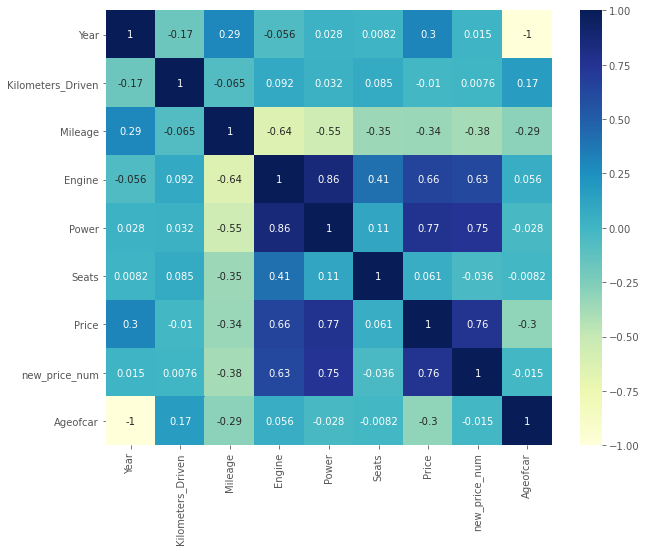

In [94]:
plt.figure(figsize=(10,8))
sns.heatmap(cars.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>

    
- Engine has strong positive correlation to Power [0.86]. 
- Price has positive correlation to Engine[0.66] as well Power [0.77].
- Mileage is negative correlated to Engine,Power,Price.,Ageofcar
- Price has negative  correlation to age of car.
- Kilometer driven doesnt impact Price


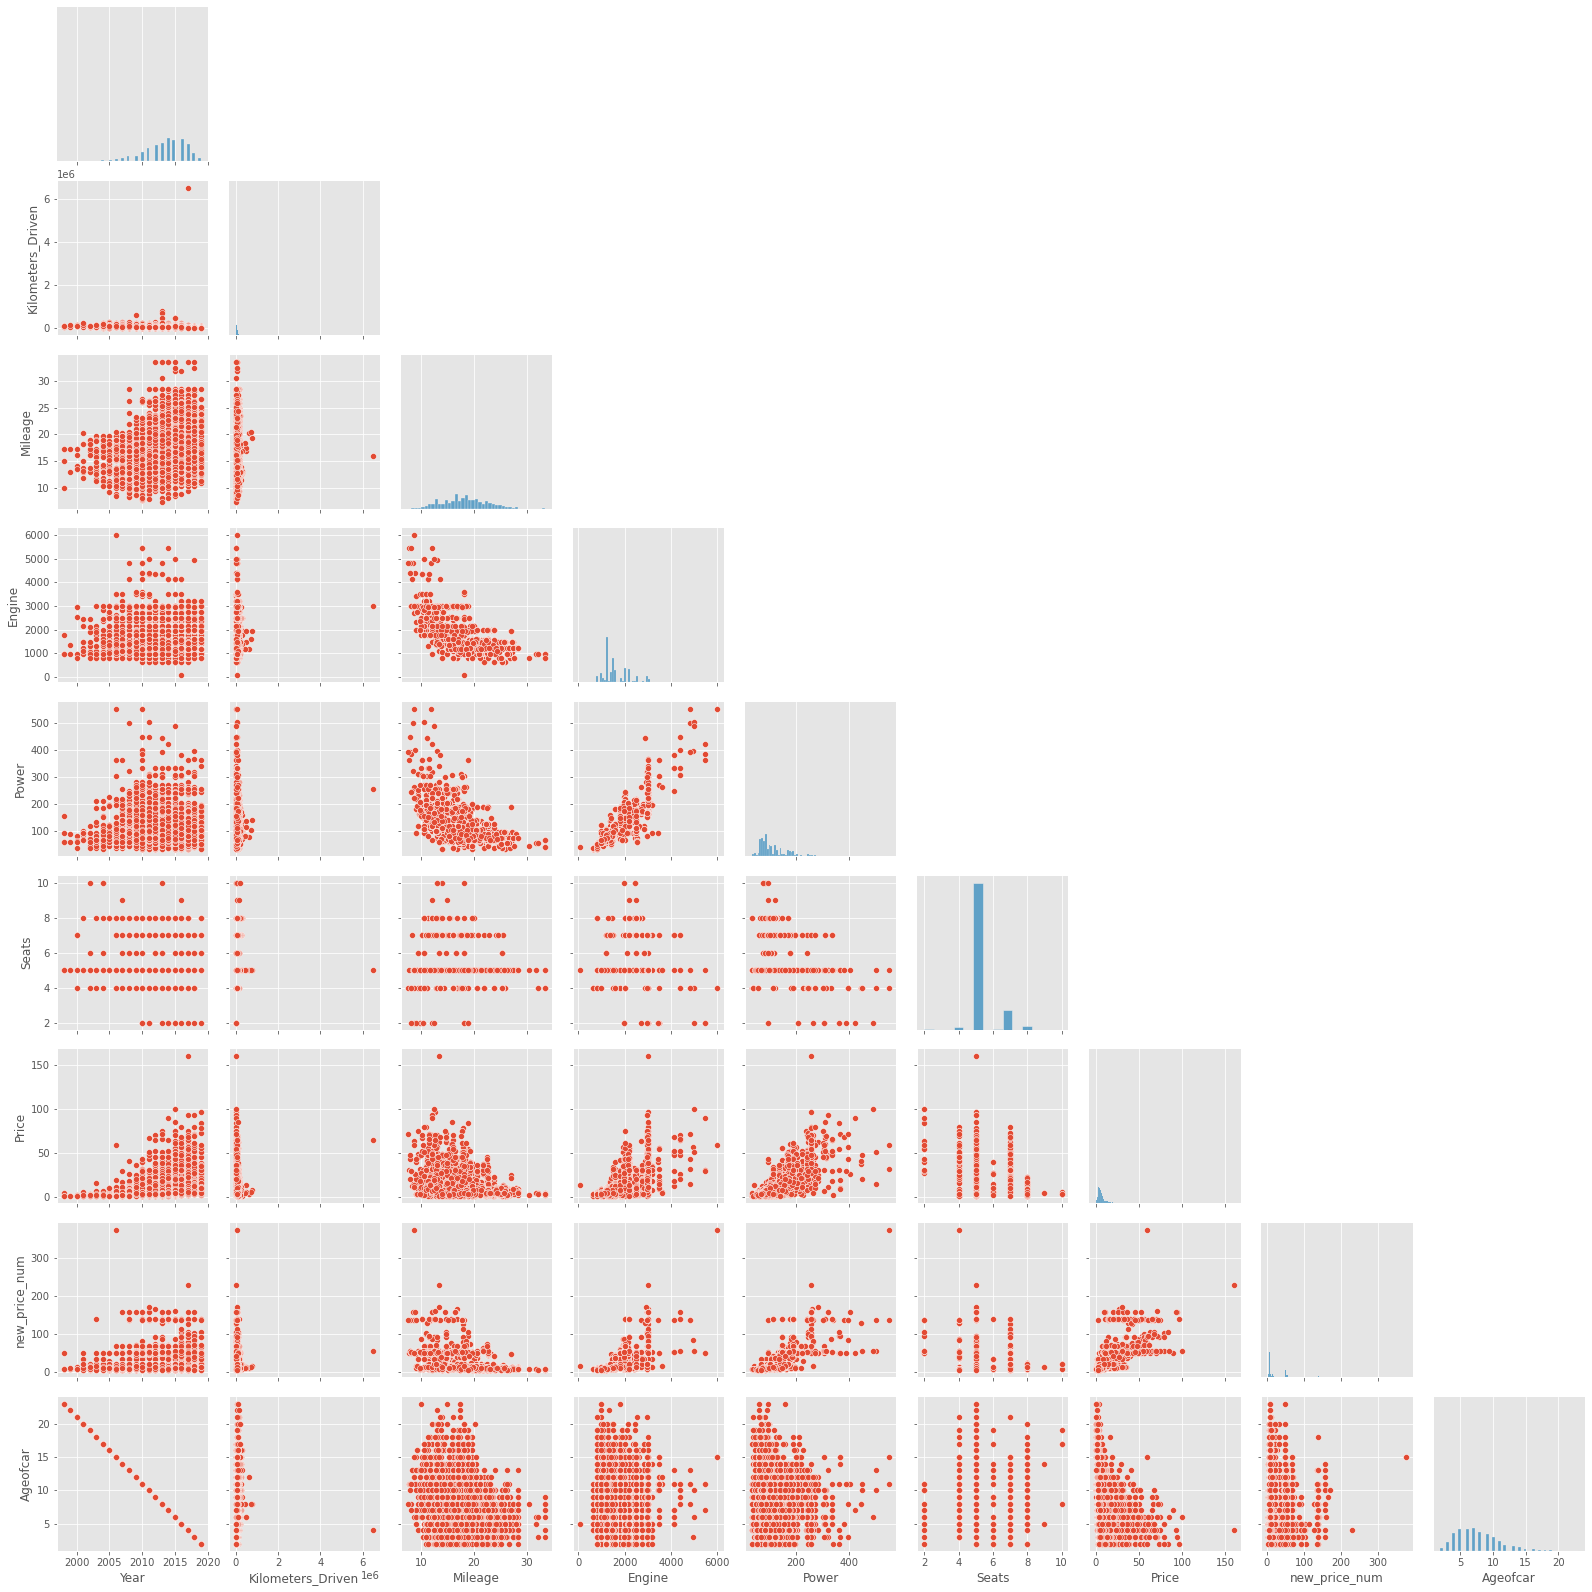

In [95]:
sns.pairplot(data=cars , corner=True)
plt.show()

<p style = "font-size : 15px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
    
- Same observation  about correlation as seen in heatmap.

- Kilometer driven  doesnot have impact on  Price . 
- As power increase mileage decrease.
- Car with recent make sell at higher prices.
- Engine and Power increase , price of the car seems to increase.

### Variables that are correlated with Price variable

#### Price  Vs Engine Vs Transmission

<AxesSubplot:title={'center':'Price VS Engine based on Transmission'}, xlabel='Price', ylabel='Engine'>

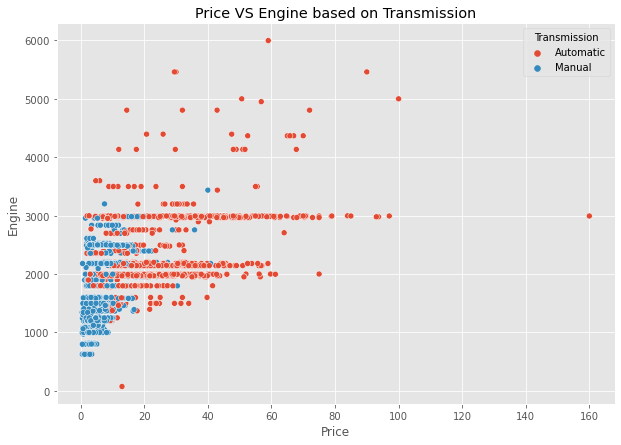

In [96]:
# understand relation ship of Engine vs Price and Transmimssion
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=cars)

#### Price Vs Power vs Transmission

<AxesSubplot:title={'center':'Price vs Power based on Transmission'}, xlabel='Price', ylabel='Power'>

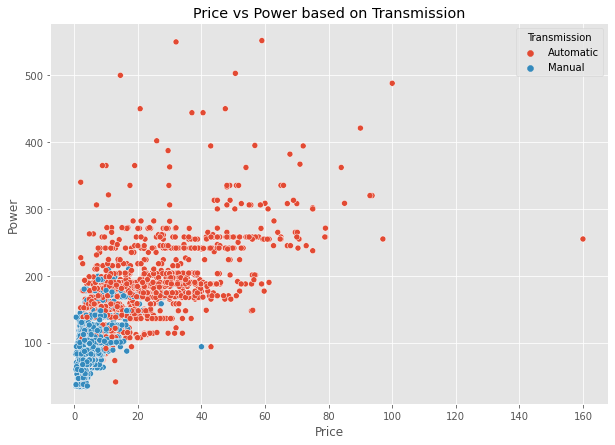

In [97]:
 #understand relationship betweem Price and Power
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=cars)

#### Price Vs Mileage Vs Transmission

<AxesSubplot:xlabel='Price', ylabel='Mileage'>

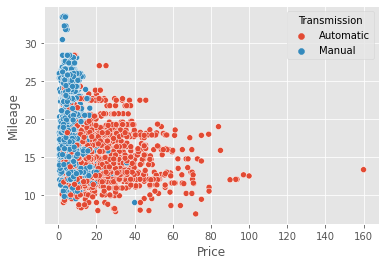

In [98]:
# Understand the relationships  between mileage and Price
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=cars)

#### Price Vs Year Vs Transmission

<AxesSubplot:title={'center':'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

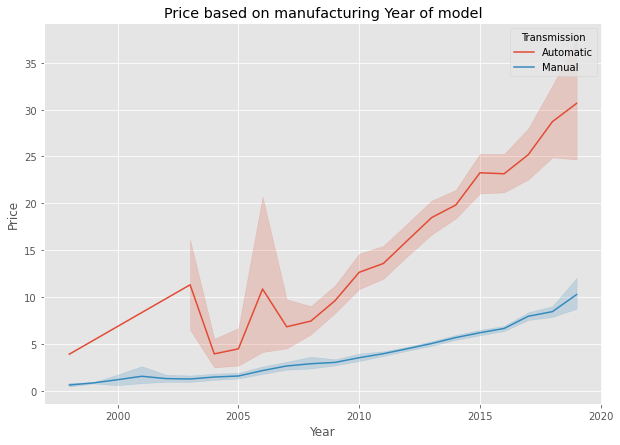

In [99]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',
             data=cars)


#### Price Vs Year VS Fuel Type

<AxesSubplot:title={'center':'Price Vs Year VS FuelType'}, xlabel='Year', ylabel='Price'>

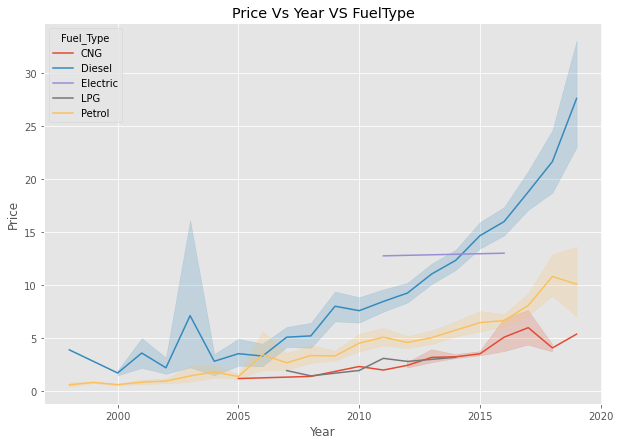

In [100]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',
             data=cars)

#### Year Vs Price Vs Owner_Type

<AxesSubplot:title={'center':'Price Vs Year VS Owner_Type'}, xlabel='Year', ylabel='Price'>

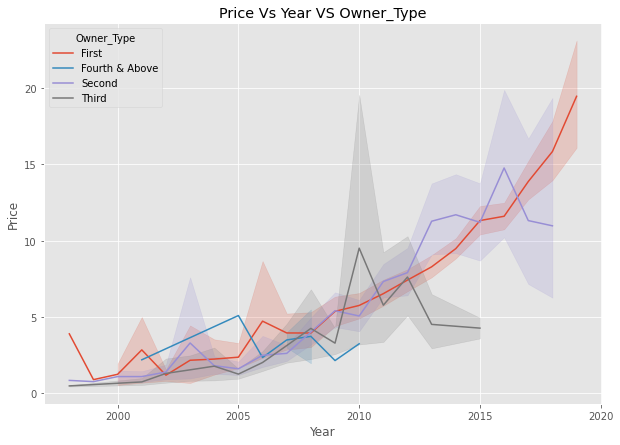

In [101]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',
             data=cars)

Need to check the reason for spike in price  for third owner and model in 2010.

In [102]:
cars[(cars["Owner_Type"]=='Third') & (cars["Year"].isin([2010]))].sort_values(by='Price',ascending =False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar,Brand,Model,Brand_Class
S.No.,,,,,,,,,,,,,,,,,
2978,Porsche Panamera 2010 2013 4S,Coimbatore,2010,42400,Petrol,Automatic,Third,8.00000,4806,394.30000,4.00000,42.91000,136.00000,11,Porsche,Panamera2010,High
5404,BMW 5 Series 2003-2012 520d,Pune,2010,170000,Diesel,Automatic,Third,18.48000,1995,177.00000,5.00000,12.00000,67.87000,11,BMW,5Series,High
3293,Toyota Innova 2.5 GX 7 STR,Pune,2010,140000,Diesel,Manual,Third,12.80000,2494,102.00000,7.00000,6.25000,21.08500,11,Toyota,Innova2.5,Low
4962,Mahindra Scorpio VLX,Bangalore,2010,144400,Diesel,Manual,Third,12.05000,2179,120.00000,8.00000,5.25000,10.90000,11,Mahindra,ScorpioVLX,Low
3479,Volkswagen Passat 1.8 TSI MT,Mumbai,2010,60000,Petrol,Manual,Third,14.30000,1798,160.00000,5.00000,3.50000,10.94000,11,Volkswagen,Passat1.8,High
1629,Maruti Swift Lxi BSIII,Pune,2010,54898,Petrol,Manual,Third,16.10000,1298,88.20000,5.00000,2.50000,7.00000,11,Maruti,SwiftLxi,Low
5351,Volkswagen Polo Petrol Highline 1.2L,Pune,2010,79000,Petrol,Manual,Third,16.47000,1198,73.90000,5.00000,2.44000,10.94000,11,Volkswagen,PoloPetrol,High
698,Ford Figo Diesel ZXI,Jaipur,2010,100002,Diesel,Manual,Third,20.00000,1399,68.00000,5.00000,1.28000,11.47500,11,Ford,FigoDiesel,Low


The observation is for The Porsche Panamera is expensive and luxury car so the data is valid.

In [103]:
cars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar
count,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000
mean,2013.39766,58655.30109,18.32189,1625.08452,113.00404,5.27834,9.59542,19.09573,7.60234
std,3.26869,92128.10804,4.16939,600.79522,53.52478,0.79759,11.17328,22.74291,3.26869
min,1998.00000,171.00000,7.50000,72.00000,34.20000,2.00000,0.44000,3.91000,2.00000
25%,2012.00000,33736.75000,15.30000,1198.00000,75.00000,5.00000,3.50000,8.07000,5.00000
50%,2014.00000,53000.00000,18.20000,1493.00000,93.70000,5.00000,5.75000,9.66500,7.00000
75%,2016.00000,72683.25000,21.10000,1984.00000,138.10000,5.00000,10.12000,16.45000,9.00000
max,2019.00000,6500000.00000,33.54000,5998.00000,552.00000,10.00000,160.00000,375.00000,23.00000


#### Price Vs Mileage vs Fuel_type

<AxesSubplot:title={'center':'Price Vs Mileage'}, xlabel='Mileage', ylabel='Price'>

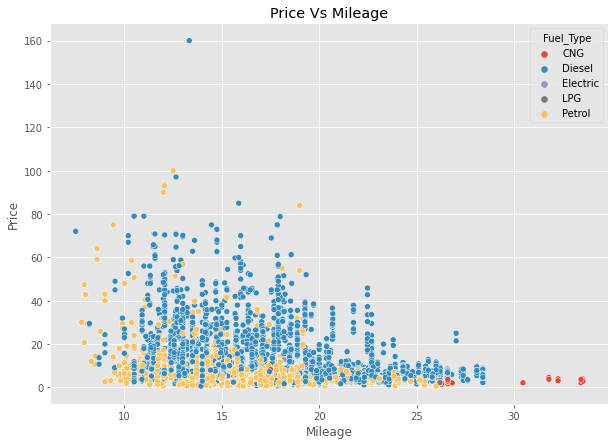

In [104]:
# Understand relationships  between price and mileage
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=cars)

#### Price Vs Seat

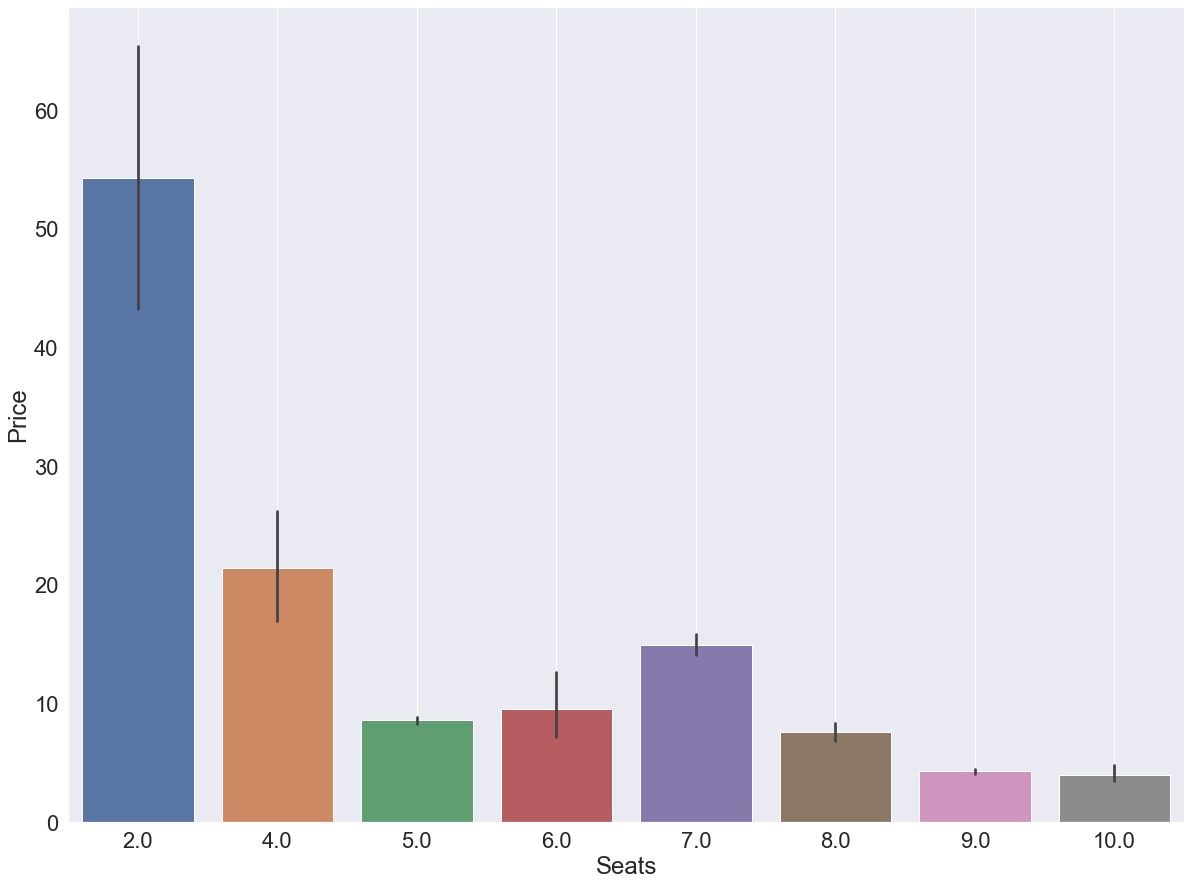

In [105]:
#Price and seats 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Seats', y='Price', data=cars)
plt.grid()

#### Price Vs Location

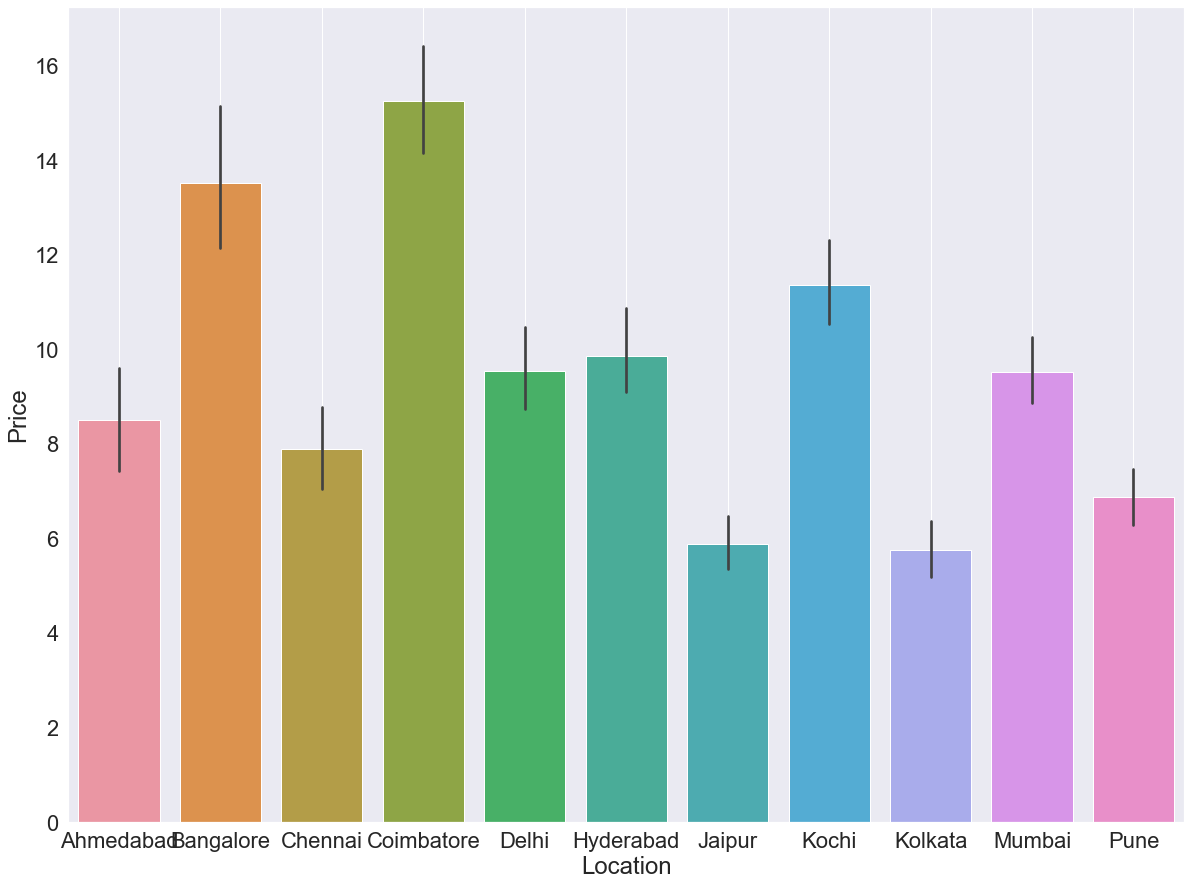

In [106]:
#Price and LOcation 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price', data=cars)
plt.grid()

#### Price Vs Brand

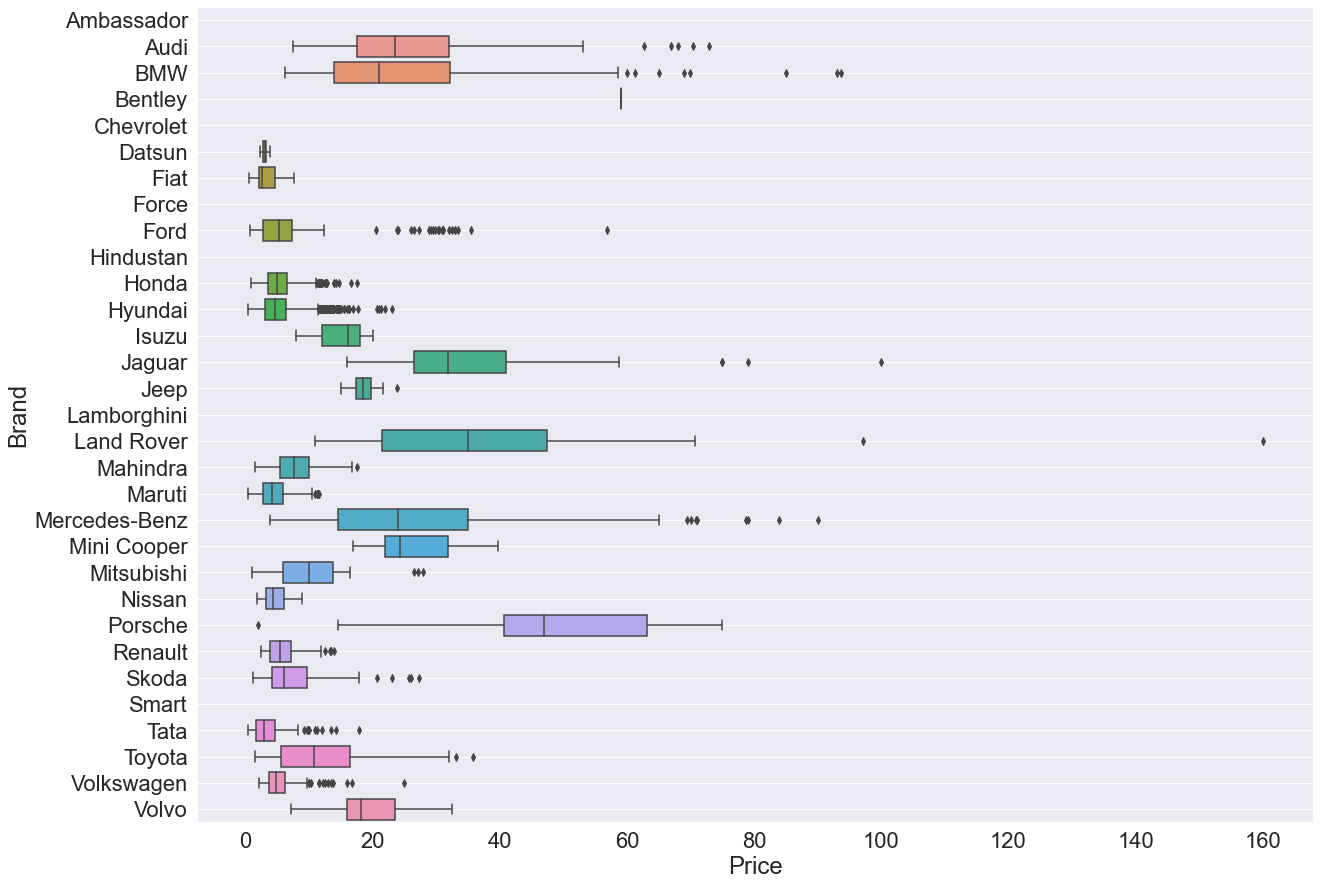

In [107]:
#Price and band 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='Price', y='Brand', data=cars)
plt.grid()

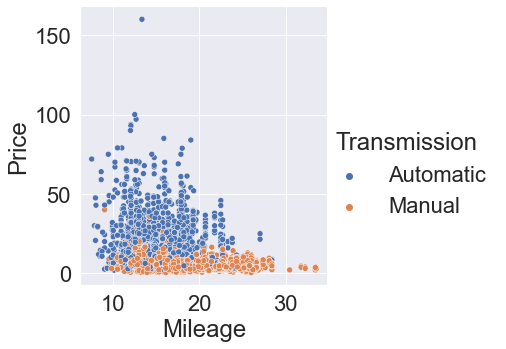

In [108]:
sns.relplot(data=cars, y='Price',x='Mileage',hue='Transmission',aspect=1,height=5)

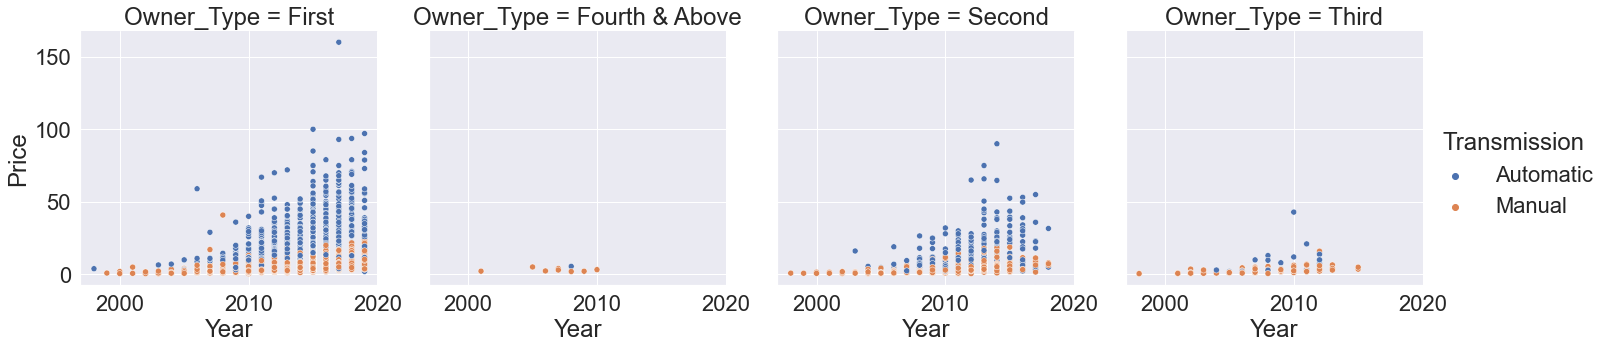

In [109]:
sns.relplot(data=cars, y='Price',x='Year',col='Owner_Type',hue='Transmission',aspect=1,height=5)

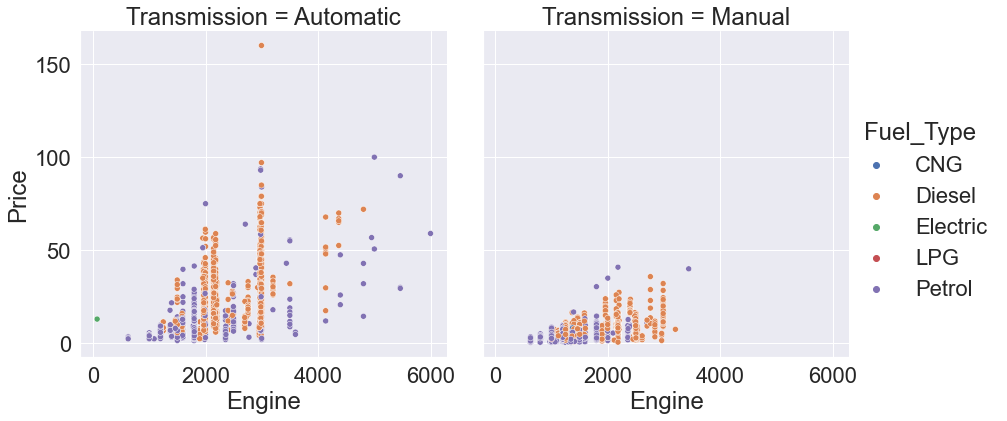

In [110]:
sns.relplot(data=cars, y='Price',x='Engine',col='Transmission',aspect=1,height=6,hue="Fuel_Type")

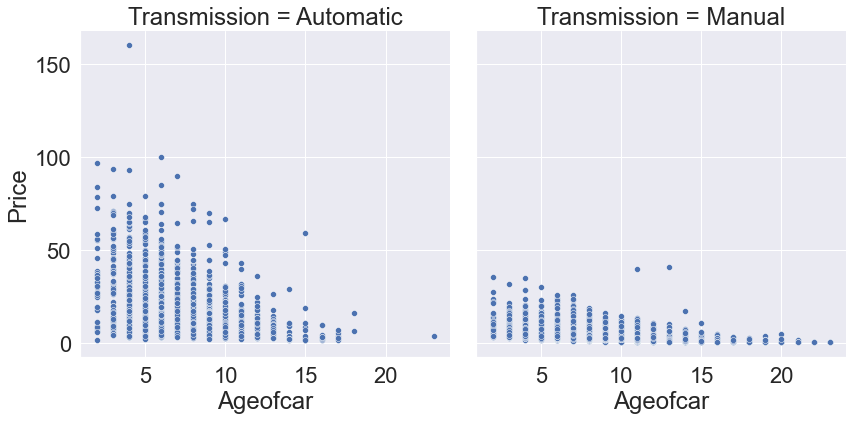

In [111]:

sns.relplot(data=cars, y='Price',x='Ageofcar',col='Transmission',aspect=1,height=6)

# Insights based on EDA

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
<b>Observations</b>
</p>


- Expensive cars are in Coimbatore and Banglore.
- 2 Seater cars are more expensive.
- Deisel Fuel type car are more expensive compared to other fuel type.
- As expected, Older model are sold cheaper compared to latest model
- Automatic transmission vehicle have a higher price than manual transmission vehicles.
- Vehicles with more engine capacity have higher prices. 
- Price decreases as number of owner increases.
- Automatic transmission require high engine and power.
- Prices for Cars with fuel type as Deisel has increased with recent models 
- Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

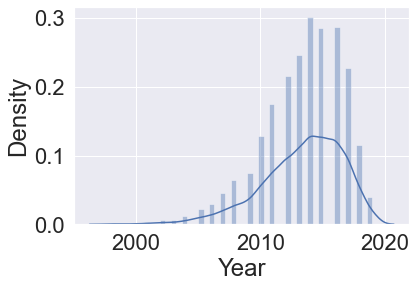

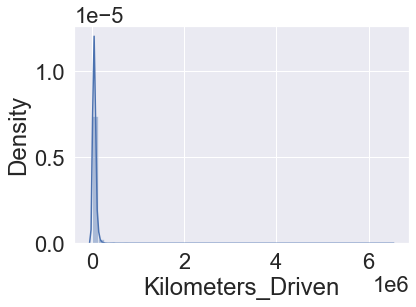

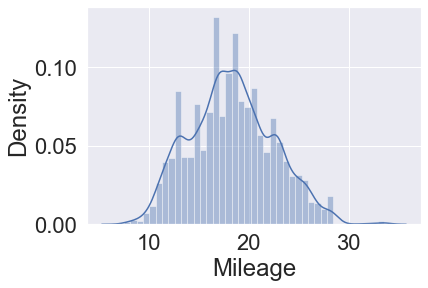

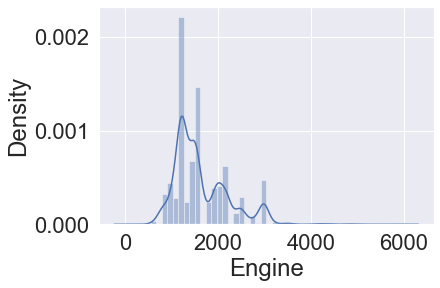

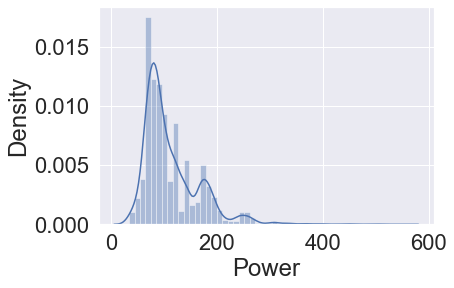

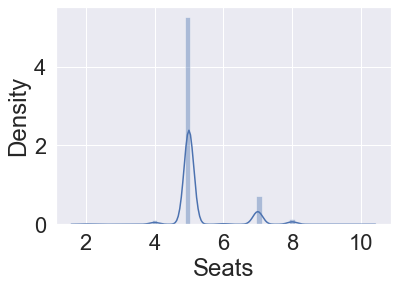

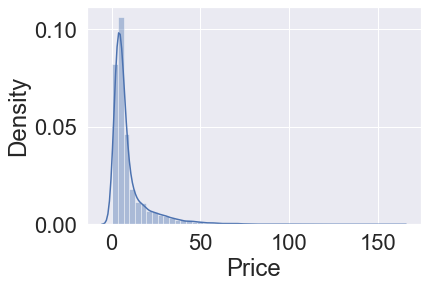

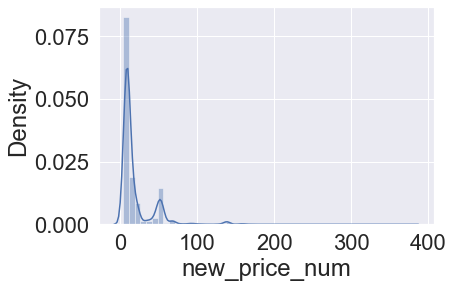

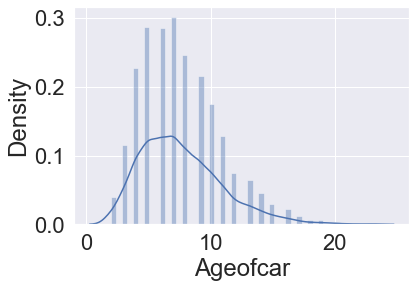

In [112]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform
cols_to_log = cars.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(cars[colname], kde=True)
    plt.show()

Distrubtions are right skewed , using Log transform can help in normalization

In [113]:

def Perform_log_transform(df,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    #df.drop(col_log, axis=1, inplace=True)
    df.info()

In [114]:
#This needs to be done before the data is split
Perform_log_transform(cars,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 0 to 6017
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   5892 non-null   object  
 1   Location               5892 non-null   category
 2   Year                   5892 non-null   int64   
 3   Kilometers_Driven      5892 non-null   int64   
 4   Fuel_Type              5892 non-null   category
 5   Transmission           5892 non-null   category
 6   Owner_Type             5892 non-null   category
 7   Mileage                5892 non-null   float64 
 8   Engine                 5892 non-null   int32   
 9   Power                  5892 non-null   float64 
 10  Seats                  5892 non-null   float64 
 11  Price                  5892 non-null   float64 
 12  new_price_num          5892 non-null   float64 
 13  Ageofcar               5892 non-null   int64   
 14  Brand                  5892 non-null   c

In [115]:
#dropping irrelevant features
cars.drop(['Name','Model','Year','Brand','new_price_num'],axis=1,inplace=True)

In [116]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 0 to 6017
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               5892 non-null   category
 1   Kilometers_Driven      5892 non-null   int64   
 2   Fuel_Type              5892 non-null   category
 3   Transmission           5892 non-null   category
 4   Owner_Type             5892 non-null   category
 5   Mileage                5892 non-null   float64 
 6   Engine                 5892 non-null   int32   
 7   Power                  5892 non-null   float64 
 8   Seats                  5892 non-null   float64 
 9   Price                  5892 non-null   float64 
 10  Ageofcar               5892 non-null   int64   
 11  Brand_Class            5892 non-null   category
 12  Kilometers_Driven_log  5892 non-null   float64 
 13  Price_log              5892 non-null   float64 
dtypes: category(5), float64(6), int32(1), in

## <p style = "font-size : 25px ;text-align: left;color:brown;font-family:TimesNewRoman"><b>Model Building -stats model</b></p>

In [117]:
X = cars.drop(["Price", "Price_log"], axis=1)
y = cars[["Price_log", "Price"]]

### Creating dummy variables

In [118]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [119]:
#Dummy variable creation is done before spliting the data , so all the different categories are covered
#create dummy variable
X = encode_cat_vars(X)
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Ageofcar,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
S.No.,,,,,,,,,,,,,,,,,,,,,
0,72000,26.60000,998,58.16000,5.00000,11,11.18442,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,41000,19.67000,1582,126.20000,5.00000,6,10.62133,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,46000,18.20000,1199,88.70000,5.00000,10,10.73640,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,87000,20.77000,1248,88.76000,7.00000,9,11.37366,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,40670,15.20000,1968,140.80000,5.00000,8,10.61325,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (4124, 26)
X_test: (1768, 26)
y_train: (4124, 2)
y_test: (1768, 2)


In [121]:
X_train = sm.add_constant(X_train)  # Statsmodel api does not add a constant by default. We need to add it explicitly.

X_test = sm.add_constant(X_test)  # Add constant to test data

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    return olsmodel.fit()      #We then need to fit the model by calling the OLS object’s fit() method. Ignore the warning about the kurtosis test if it appears, we have only 16 examples in our dataset and the test of the kurtosis is valid only if there are more than 20 examples.

In [122]:
#fit statmodel
olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     1322.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:46:38   Log-Likelihood:                -658.35
No. Observations:                4124   AIC:                             1371.
Df Residuals:                    4097   BIC:                             1541.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 


    
* Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in price of used cars for upto 89% 
    
* The model is not an underfitting or overfitting model.
    
* To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.
    
* Before we move on to assumption testing, we'll do a quick performance check on the test data.

### cost functions
A loss function is for a single training example. It is also sometimes called an error function. A cost function, on the other hand, is the average loss over the entire training dataset. The optimization strategies aim at minimizing the cost function.

In [123]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Price"]


    y_pred_test_pricelog = olsmodel.predict(x_test) # Now we calculate the predicted values 
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, X_train, X_test)  # High Overfitting.

    Data    RMSE     MAE     MAPE
0  Train 6.55093 2.28228 23.33998
1   Test 7.44709 2.51399 23.60918


   
* Root Mean Squared Error of train and test data is not  different, indicating that our model is not overfitting the train data.
    
* Mean Absolute Error indicates that our current model is able to predict used cars prices within mean error of 2.5 lakhs on test data.
    
* The units of both RMSE and MAE are same - Lakhs in this case. But RMSE is greater than MAE because it peanalises the outliers more.
    
* Mean Absolute Percentage Error is ~23% on the test data.

## <p style = "font-size : 25px ;text-align: left;color:brown;font-family:TimesNewRoman"><b>Test Assumptions</b></p>

## Checking the Linear Regression Assumptions

1. **No Multicollinearity**
2. **Mean of residuals should be 0**
3. **No Heteroscedasticity**
4. **Linearity of variables**
5. **Normality of error terms**

### Checking Assumption 1: No Multicollinearity 
Multicollinearity occurs when the independent variables are highly correlated, i.e., the independent variables depend on each other.

Multicollinearity is often a dire threat to our model. To detect the impact of multicollinearity among the variables we can use the Variance Inflation Factor(VIF).

If the VIF is high for an independent variable then there is a chance that it is already explained by another variable.

Independent variables with VIF value greater than 5 may be correlated.


We will use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


In [125]:
# Check VIF
print(checking_vif(X_train))

                      feature        VIF
0                       const 1062.04981
1           Kilometers_Driven    2.93017
2                     Mileage    3.46285
3                      Engine    8.92501
4                       Power    6.92472
5                       Seats    2.09092
6                    Ageofcar    2.07487
7       Kilometers_Driven_log    3.34652
8          Location_Bangalore    2.41019
9            Location_Chennai    3.01294
10        Location_Coimbatore    3.44626
11             Location_Delhi    3.20233
12         Location_Hyderabad    3.80468
13            Location_Jaipur    2.70344
14             Location_Kochi    3.51621
15           Location_Kolkata    3.04719
16            Location_Mumbai    3.98210
17              Location_Pune    3.38664
18           Fuel_Type_Diesel   27.15677
19         Fuel_Type_Electric    1.06173
20              Fuel_Type_LPG    1.19256
21           Fuel_Type_Petrol   28.13755
22        Transmission_Manual    2.03453
23  Owner_Type_F

Let us now remove multicollinearity from the model. Engine,power,Fuel_type have high mutlicollinearity.but fuel_type is an important feature in model prediction. So will remove engine.

In [126]:
X_train1=X_train.drop(['Engine'],axis=1)
X_test1=X_test.drop(['Engine'],axis=1)
olsmodel2= build_ols_model(X_train1)

print(olsmodel2.summary())

# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1344.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:46:39   Log-Likelihood:                -700.79
No. Observations:                4124   AIC:                             1454.
Df Residuals:                    4098   BIC:                             1618.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [127]:
print(checking_vif(X_train1))

                      feature        VIF
0                       const 1036.27774
1           Kilometers_Driven    2.91546
2                     Mileage    2.82471
3                       Power    3.00378
4                       Seats    1.84216
5                    Ageofcar    2.07123
6       Kilometers_Driven_log    3.34005
7          Location_Bangalore    2.41017
8            Location_Chennai    3.01080
9         Location_Coimbatore    3.44601
10             Location_Delhi    3.20194
11         Location_Hyderabad    3.80389
12            Location_Jaipur    2.70333
13             Location_Kochi    3.51610
14           Location_Kolkata    3.04702
15            Location_Mumbai    3.98202
16              Location_Pune    3.38634
17           Fuel_Type_Diesel   27.14402
18         Fuel_Type_Electric    1.06038
19              Fuel_Type_LPG    1.18991
20           Fuel_Type_Petrol   27.79160
21        Transmission_Manual    2.03185
22  Owner_Type_Fourth & Above    1.00989
23          Owne


We have removed multicollinearity from the data now.Fuel_Type variables are showing high vif because most cars are either diesel and petrol. These two features are correlated with each other.

We will not drop this variable from the model because this will not affect the interpretation of other features in the model.

### Checking Assumption 2: Mean of residuals should be 0

In [128]:
residuals = olsmodel2.resid
np.mean(residuals)

1.1222183194569416e-12

Mean of redisuals is very close to 0. The second assumption is also satisfied.

### Checking Assumption 3: No Heteroscedasticity

This tongue twister simply means that the variance of the error terms should be constant with respect to the independent variable.
* Homoscedacity - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

We'll use `Goldfeldquandt Test` to test the following hypothesis

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity

alpha = 0.05 

In [129]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train1)
lzip(name, test)

[('F statistic', 0.880917763040828), ('p-value', 0.997879099967991)]

[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Standardized Residuals')]

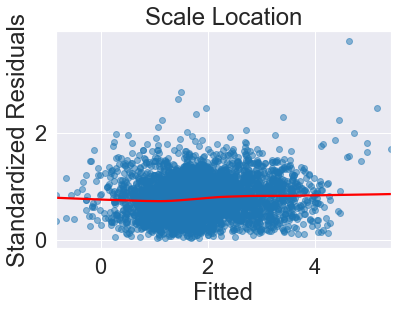

In [133]:
fig, ax = plt.subplots(1, 1)
standardized_resid1 = np.sqrt(np.abs(olsmodel2.get_influence().resid_studentized_internal))
sns.regplot(olsmodel2.predict(), standardized_resid1, color='#1f77b4', lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Scale Location')
ax.set(xlabel='Fitted', ylabel='Standardized Residuals')


    
Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic. 

We can see that the variance of the residuals.   it is not a cone-shaped and also no pattern of outliers.

### Checking Assumption 4: Linearity of variables
This assumption states that the relationship between the dependent and the independent variable should be linear.

We can test this assumption with a simple scatter plot.

A plot of the fitted versus residuals values can be used to test this assumption. This plot indicates if there are non-linear patterns in the residuals and thus in the data as well.
They should be randomly and uniformly scattered on the x axis.

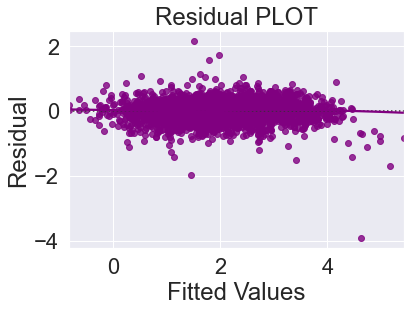

In [134]:
# predicted values
fitted = olsmodel2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(fitted, residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Assumptions 4 is satisfied by our olsmodel2. There is no pattern in the residual vs fitted values plot.

### Checking Assumption 5: Normality of error terms

Another assumption made by the OLS is that the errors are normally distributed. Plotting the errors will show the distribution of errors.

Q-Q plot is a graphical technique used to determine whether the residuals are normally distributed.

If the points are normally distributed then the points will fall on a straight diagonal line.

<AxesSubplot:ylabel='Density'>

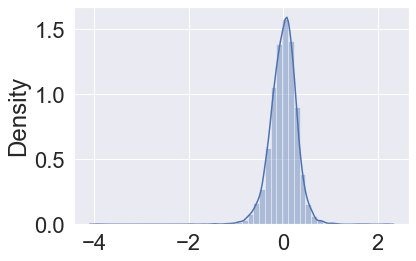

In [135]:
sns.distplot(residuals)

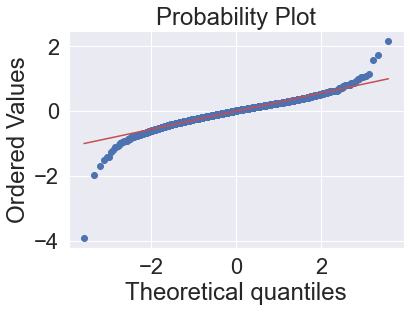

In [136]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

The residuals have a close to normal distribution. Assumption 5 is also satisfied.
We should further investigate these values in the tails where we have made huge residual errors.

Now that we have seen that olsmodel2 follows all the linear regression assumptions. Let us use this model to draw inferences.

In [137]:
print(olsmodel2.summary())
# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1344.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:53:23   Log-Likelihood:                -700.79
No. Observations:                4124   AIC:                             1454.
Df Residuals:                    4098   BIC:                             1618.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Observations from the model



    
 **It is important to note here that the predicted values are log(price) and therefore coefficients have to be converted accordingly to understand their influence in price.**

1. With our linear regression model we have been able to capture ~89 variation in our data.
    
2. The model indicates that the most significant predictors of price of used cars are - 
    - Age of the car
    - Number of seats in the car
    - Power of the engine
    - Mileage
    - Kilometers Driven
    - Location
    - Fuel_Type
    - OwnerType
    - Transmission - Automatic/Manual
        
3. Newer cars sell for higher prices. 1 unit increase in age  of the car leads to [ exp(0.1123) = 1.12 Lakh ] decrease in the price of the vehicle, when everything else is constant.


4. As the number of seats increases, the price of the car increases - exp(0.05) = 1.05 Lakhs
    
5. Mileage is inversely correlated with Price. Generally, high mileage cars are the lower budget cars.
    
6. Kilometers Driven have a negative relationship with the price which is intuitive. A car that has been driven more will have more wear and tear and hence sell at a lower price, everything else being 0.
    
7. The categorical variables are a little hard to interpret. But it can be seen that all the car_category variables in the dataset have a negative relationship with the Price and the magnitude of this negative relationship decrease as the brand category moves to lower brands.

# Recommendations



- Our final Linear Regression model has a MAPE of 23% on the test data, which means that we are able to predict within 23% of the price value. This is a very good model but can be further improved
    
- Some southern markets tend to have higher prices. It might be a good strategy to plan growth in southern cities using this information. Markets like Kolkata(coeff = -0.2) are very risky and we need to be careful about investments in this area.

   
- Based on Analysis,  we can to divide our cars into 3 segment Low, Medium and High budget.
    
- Brands like Maruti, Hyundai ,Honda are low budget and very popular brands in used car market.
    
- Brands  like BMW, Bentley, Jaguar, Land Rover, Mercedes Benz,Porche,Mini Cooper are high budget cars and are mostly bought by car enthusiast who are ready to buy a  two user owned car at higher price as well. 
    
- Brands  like Toyota,Volvo can be Medium budget cars.
    
- Mumbai and Hyderbad seems to be more popular in Used car market, need to verify this with more data from other demographic regions. The next step post that would be to cluster different sets of data and see if we should make multiple models for different locations/car types. 
    
- Need to acquire more Automatic cars  to earn more profits, as this car sell at higher prices.
    
- With Increasing petrol rates diesel car are in more demand  in recent years, acquiring and selling them can high profits
    
- Along with this we can include scheme like take a test drive for  half day to pursue customer to buy.
    
- We can provide Car maintenance packages where  customers  pays a small upfront fees and   can bring the car for servicing anytime in a year to attract more customers.
    
  
<b>Important points</b>
- There are more soft parameters which also should be considered when buying a car, the wear and tear the car has been through and how much the company will have to work on car to make it ready for sale.
    
- If the car as already been in some kind of accident that would also effect the price.
    
- Other good to have feature like AC,Moon roof,Airbags can also have impact on the price.
    
- Car model that are too old will depreciate a lot  can impact the demand .

--------------------------------------------- THE END ---------------------------------------------------------

# QUESTIONS AND ANSWERS

Q. Hi Yogita, first of all great notebook. Learned a lot. And secondly I did not understand why grouping before filling the null values. Is it necessary or depends on the situation. And how does this help particularly with this case.

ANS:
Thank you Karan for checking out my notebook. In order to fill the missing values which are null, usually, people either taken mean and median. Grouping based on some categorical variable, I am trying to bring the missing value near to the actual value as much a possible. For eg. here if you see there are 7253 rows and only 2041 unique names. So chances are the Names of models are already present whose value can be used for the same Model where data is missing. So instead of taking median directly, grouping on Name, and then trying for brands. It depends on case to case basis, but for better granularity grouping on some categorical variable might help to get near to accurate value to fill nan.

Q. Can the same approach be used to handle missing values in categorical data. Or it is better to just replace it with mode. Assuming I have 60% null values in a categorical feature. And if so how? Also one other thing if my numerical feature has more than 50% values as 0 then what can we do with that. I have tried log transformation by adding constant.(Doesn't work). Sqrt the column(doesn't work). Should I remove it altogether or there is something we can do to normalize it.

ANS:
I have used a similar method for categorical data as well, but you can also label it as Unknown category or use KNN Imputer so that you don't lose any data. About numerical features need to understand data, see distribution to decide, Its correlation with other features. Usually removing features should be the last option.